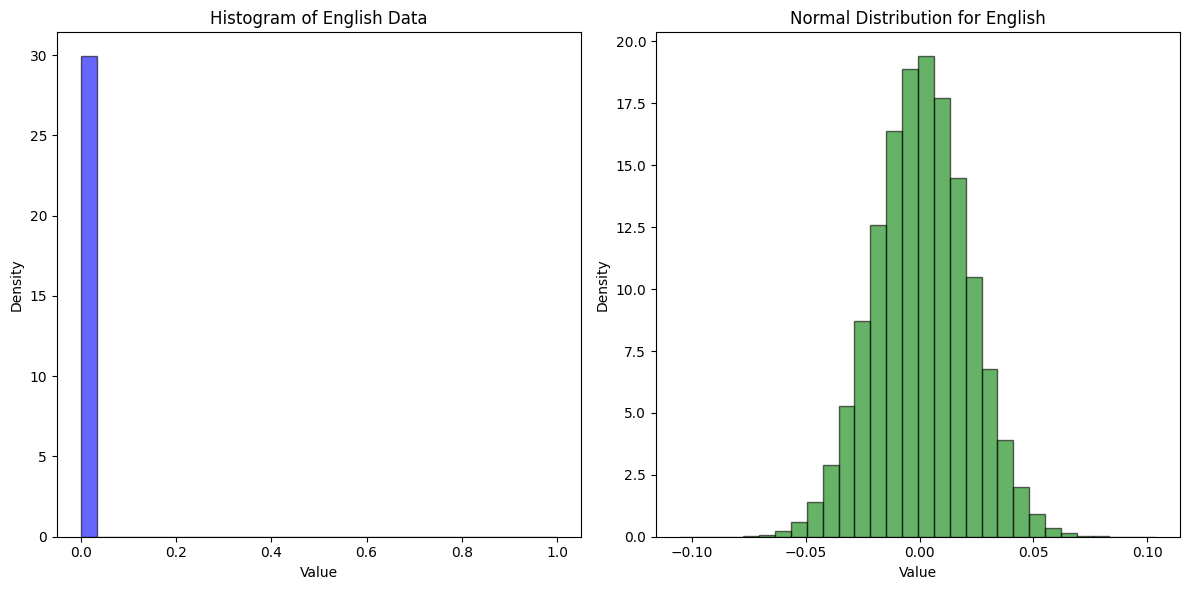

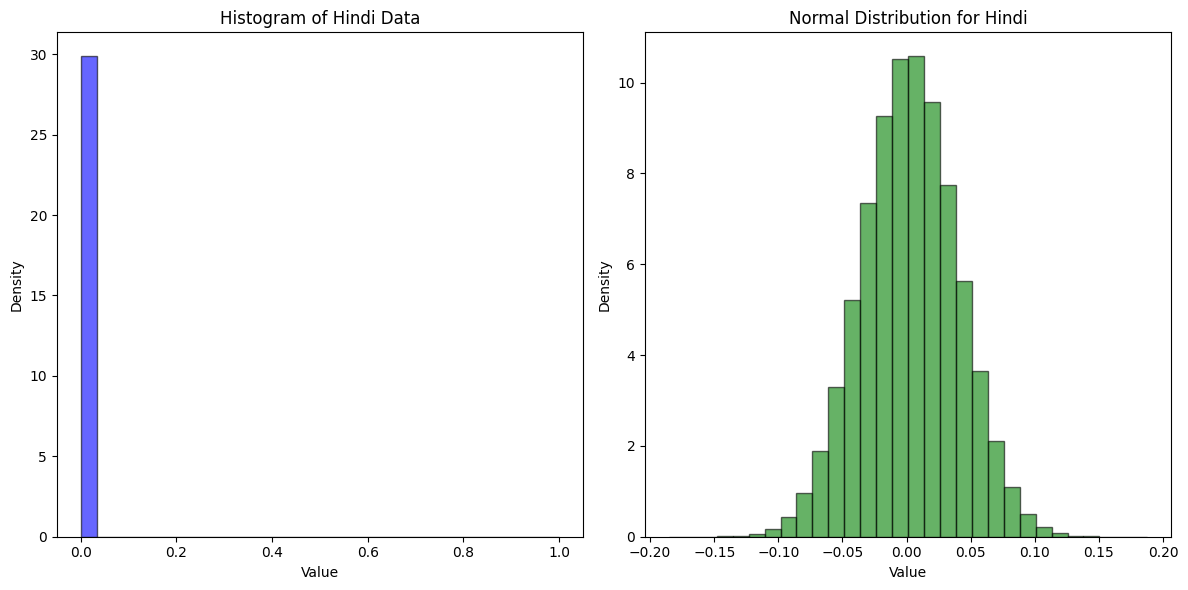

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_normal_distribution_and_histogram(data, title, bins=30):
    """
    Plot a normal distribution based on the project data and compare it with a histogram of the given data.

    Parameters:
    - data (numpy.ndarray): Data to be plotted.
    - title (str): Title for the plot.
    - bins (int): Number of bins for the histogram.
    """
    # Calculate mean and standard deviation for normal distribution
    mean = np.mean(data)
    std_dev = np.std(data)

    # Generate normal distribution data
    normal_data = np.random.normal(mean, std_dev, size=len(data))

    plt.figure(figsize=(12, 6))

    # Plot Histogram of Project Data
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black')
    plt.title(f'Histogram of {title} Data')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Plot Normal Distribution
    plt.subplot(1, 2, 2)
    plt.hist(normal_data, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.title(f'Normal Distribution for {title}')
    plt.xlabel('Value')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

def main():
    # Load the dataset from the Excel file
    df = pd.read_excel('/content/Book1.xlsx')

    # Strip leading/trailing spaces from column names
    df.columns = df.columns.str.strip()

    # Extract texts from ENGLISH and HINDI columns
    english_texts = df['ENGLISH'].tolist()
    hindi_texts = df['HINDI'].tolist()

    # Create a TF-IDF Vectorizer and fit_transform the text data
    vectorizer = TfidfVectorizer()

    # TF-IDF for ENGLISH
    tfidf_matrix_english = vectorizer.fit_transform(english_texts).toarray()
    flattened_english_data = tfidf_matrix_english.flatten()

    # TF-IDF for HINDI
    tfidf_matrix_hindi = vectorizer.fit_transform(hindi_texts).toarray()
    flattened_hindi_data = tfidf_matrix_hindi.flatten()

    # Plot normal distribution and histogram for ENGLISH
    plot_normal_distribution_and_histogram(flattened_english_data, 'English')

    # Plot normal distribution and histogram for HINDI
    plot_normal_distribution_and_histogram(flattened_hindi_data, 'Hindi')

if __name__ == "__main__":
    main()
